In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Transformation Matrices
### Rotation Matrices

Identify which of the matrices below rotates the vector  
$\boldsymbol{x} = (1, 1)^\top$ by $\alpha = 90^{\circ}$,  
that is, transforms it into the vector $\boldsymbol{y} = (-1, 1)^\top$ according to the equation  
$$
R \boldsymbol{x} = \boldsymbol{y},
$$
where $R$ is the **rotation matrix**.

Note that the rotation by $90^{\circ}$ only changes the **sign of the x-axis coordinate**, effectively rotating the vector counterclockwise.


In [14]:
x = np.array([[1],[1]])

R1 = np.array([[1,0],[0,-1]])
R2 = np.array([[-1,0],[0,1]])
R3 = np.array([[0,-1],[0,1]])
R4 = np.array([[0,1],[0,-1]])
R5 = np.array([[1,0],[-1,0]])
R6 = np.array([[-1,0],[1,0]])
R7 = np.array([[0,1],[-1,0]])
R8 = np.array([[0,-1],[1,0]])
print(f"R1 rot: {(R1 @ x).T}")
print(f"R2 rot: {(R2 @ x).T}")
print(f"R3 rot: {(R3 @ x).T}")
print(f"R4 rot: {(R4 @ x).T}")
print(f"R5 rot: {(R5 @ x).T}")
print(f"R6 rot: {(R6 @ x).T}")
print(f"R7 rot: {(R7 @ x).T}")
print(f"R8 rot: {(R8 @ x).T}")


R1 rot: [[ 1 -1]]
R2 rot: [[-1  1]]
R3 rot: [[-1  1]]
R4 rot: [[ 1 -1]]
R5 rot: [[ 1 -1]]
R6 rot: [[-1  1]]
R7 rot: [[ 1 -1]]
R8 rot: [[-1  1]]


Now, from the matrices you identified above, select those that also transform the vector  
$\boldsymbol{y} = (-1, 1)^\top$ into the vector $\boldsymbol{z} = (-1, -1)^\top$, i.e., perform **another rotation** by the same angle $\alpha$.

Can you identify the correct matrices **without using Python**?  

Use Python only to **verify** your reasoning and confirm that applying the same rotation matrix again produces $\boldsymbol{z}$.


In [11]:
y = np.array([[-1],[1]])

print(f"R1*y  = {(R1 @ y).T}" )
print(f"R8*y  = {(R8 @ y).T}" )

R1*y  = [[-1 -1]]
R8*y  = [[-1 -1]]


The identified rotation matrix can be generalized into a matrix that contains the **goniometric functions** of the angle $\alpha$. Find this matrix in the lecture slides and verify that the rotation matrix you identified earlier corresponds to this formula with $\alpha = 90^{\circ}$.

To convert the angle from degrees to radians in Python, use the function `np.radians`.

In [21]:
alpha = np.radians(90)
rot_mat = np.array([[np.cos(alpha),np.sin(-1*alpha)],[np.sin(alpha),np.cos(alpha)]])
print(rot_mat)


[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


### Mirroring of vectors around an axis - axis symmetry

In this exercise, we will rotate the vector $\boldsymbol{a} = (4, 1)^\top$ around the line $y = \tfrac{1}{2}x$.

There are several ways to perform this rotation — one of them is through **orthogonal projection**, and another is by using **rotation matrices**.  
We will follow the rotation matrix approach, consisting of three main steps:

1. **Rotate the vector** so that the line $y = \tfrac{1}{2}x$ aligns with the **x-axis**.  
   This can be done using a rotation matrix, for which you first need to find the **angle $\alpha$** between the axis (represented by some vector) and the line.

   This step is useful, as fliping a vector around the x-axis is much easier than flipping around the line.

2. **Rotate the vector** around the x-axis.

3. **Rotate the vector back** by the same angle $\alpha$ as in the first step.

For each of these steps, use a **rotation matrix** of the form  
$$
R \boldsymbol{v}_0 = \boldsymbol{v}_1,
$$
where $\boldsymbol{v}_0$ is the original vector and $\boldsymbol{v}_1$ is the rotated vector.  
You will need to construct an appropriate rotation matrix for each step.

After performing the three rotations, **verify your approach** using known angles and test vectors to confirm the correctness of your transformations.

Below, a method is provided for calculating the angle in **degrees**.  
In your rotation matrices, remember to **convert the angle to radians**, since `np.cos()` and `np.sin()` in NumPy expect the angle in radians.  

**Tip:**  
It is highly recommended to **draw** the vector, the line, and each rotation step to better understand the geometric transformation.


In [22]:
def degree_angle(a,b):
  return np.rad2deg(np.arccos((a @ b)/ (np.linalg.norm(a) * np.linalg.norm(b))))

In [ ]:
start_vct = np.array([4,1])
line_vct = np.array([2,1])
x_axis_vct = np.array([1, 0])
angle_deg = degree_angle(x_axis_vct, line_vct)

def rotation_matrix(alhpa_deg):
  alpha_rad = np.deg2rad(alhpa_deg)
  return np.array([[np.cos(alpha_rad),-np.sin(alpha_rad)],[np.sin(alpha_rad),np.cos(alpha_rad)]])

rot_matrix1 = rotation_matrix(-angle_deg)
rot_matrix2 = np.array([[1, 0], [0, -1]])
rot_matrix3 = rotation_matrix(angle_deg)


rotated_vct = rot_matrix3 @ ( rot_matrix2 @ ( rot_matrix1 @ start_vct))

print(degree_angle(rotated_vct, line_vct))
print(rotated_vct)

12.528807709151463
[3.2 2.6]


Try multiplying the three matrices you obtained above.  
What transformation does their product appear to represent?  
Do the resulting vectors form a kind of **basis**?

Write your answer and provide a brief **justification** below, explaining what the combined matrix represents (e.g., a rotation, scaling, or basis transformation).


In [ ]:
print(f"R: { rot_matrix3 @ (rot_matrix2 @ rot_matrix1)}")


R: [[ 0.6  0.8]
 [ 0.8 -0.6]]


Now, we will find the **rotation** by computing the **orthogonal projection** of the vector  
$\boldsymbol{a}$ onto the line $y = \tfrac{1}{2}x$.  

Refer to the lecture slides for the formula describing an orthogonal projection onto a line.  
It is highly recommended to **draw** the vector, the line, and the resulting projection vector —  this visualization will help you understand the geometric relationship and guide you through the calculation.


In [32]:
ort_vct = (start_vct.T @ line_vct) / (line_vct.T @line_vct)*line_vct 
dif_vct = ort_vct - start_vct
new_vct = start_vct + 2*dif_vct
print(new_vct)

[3.2 2.6]



## Eigenvectors and eigenvalues

We can think of matrices as **linear transformations**.  
Some matrices perform a **rotation**, others **rescale** vectors, or apply a **combination** of both.  
The result of multiplying a matrix by a vector is a **transformed vector**.
Let us define the matrix
$$
A =
\begin{pmatrix}
5 & 1\\
3 & 3
\end{pmatrix}.
$$

Now, using this matrix, we can transform all vectors of **unit length**.  
This transformation can be visualized as the **rescaling of the unit circle** (shown in blue) into an **ellipse** (shown in orange).

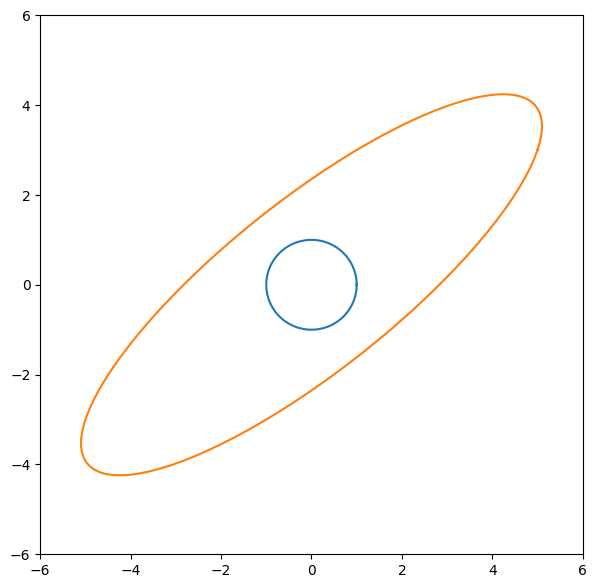

In [33]:
#@title Plotting code { display-mode: "form" }
A = np.array([[5, 1], [3, 3]])
# import matplotlib.pyplot as plt
n_steps = 100

t = np.linspace(0, 2*np.pi, n_steps)
x = np.cos(t)
y = np.sin(t)
newX = np.zeros(len(x))
newY = np.zeros(len(x))
for i in range(len(x)):
  unitVector_i = np.array([x[i], y[i]])
  # Apply the matrix to the vector
  newXY = A.dot(unitVector_i)
  newX[i] = newXY[0]
  newY[i] = newXY[1]

plt.figure(figsize=[7,7])
plt.plot(x, y)
plt.plot(newX, newY)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

Generally, there exist at least two directions where the vectors after transformation will not change the direction but only the magnitude. The vectors that point in these directions are called eigenvectors.

In general, there exist at least two directions in which vectors, after a linear transformation, do not change their **direction** but only their **magnitude**.  
The vectors that lie along these directions are called **eigenvectors**.

In [34]:
#@title Function for plotting vectors { display-mode: "form" }
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    # plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

Run the code below to display the vector $\boldsymbol{v} = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$.

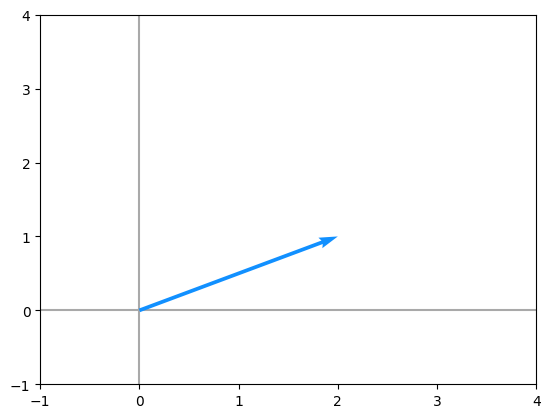

In [35]:
v=np.array([[2],[1]])
plotVectors([v.flatten()], cols=['#1190FF'])
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

If we compute $ \boldsymbol{w} = A\boldsymbol{v} $, we can observe how the matrix $A$ transforms the vector $\boldsymbol{v}$ (shown in light blue) into the new vector $\boldsymbol{w}$ (shown in orange).


Vector w:
 [[11]
 [ 9]]


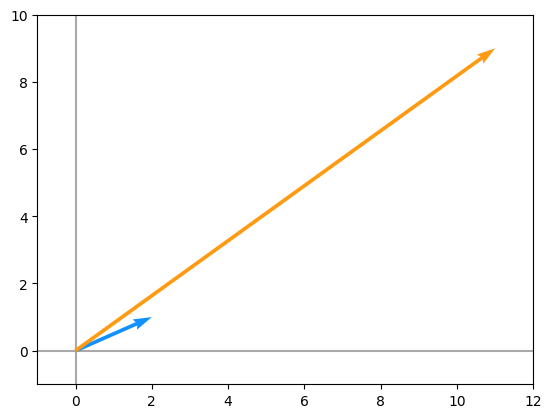

In [36]:
Av = A.dot(v)
print(f"Vector w:\n {Av}")
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.xlim(-1, 12)
plt.ylim(-1, 10)
plt.show()

We can try another vector, for example $\boldsymbol{v} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$.

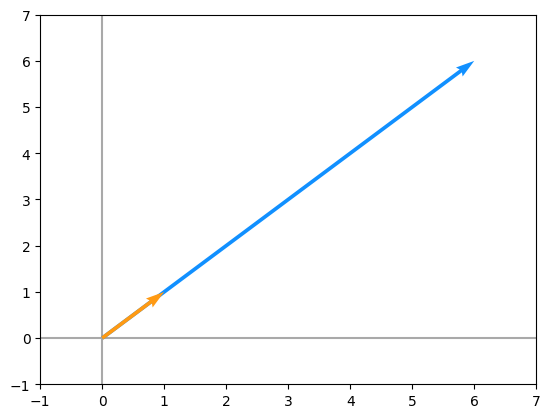

In [39]:
v = np.array([[1], [1]])
Av = A.dot(v)
plotVectors([Av.flatten(),v.flatten()], cols=['#1190FF', '#FF9A13'])
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

We can see that the transformation did **not change the direction** of this vector.  
If a matrix changes only the **magnitude** of a vector but not its **direction**, that vector is an **eigenvector** of the matrix.

The relationship defining eigenvectors is given by the equation:

$$
A\boldsymbol{v} = \lambda \boldsymbol{v},
$$

where $\lambda$ is the **eigenvalue** (a scalar) corresponding to the eigenvector $\boldsymbol{v}$.

We know that one eigenvector of $A$ is:

$$
\boldsymbol{v} =
\begin{pmatrix}
1 \\ 1
\end{pmatrix}.
$$

Let's check that $A\boldsymbol{v} = \lambda \boldsymbol{v}$:

$$
\begin{pmatrix}
5 & 1 \\
3 & 3
\end{pmatrix}
\begin{pmatrix}
1 \\ 1
\end{pmatrix}
=
\begin{pmatrix}
6 \\ 6
\end{pmatrix}.
$$

We can observe that:

$$
6
\begin{pmatrix}
1 \\ 1
\end{pmatrix}
=
\begin{pmatrix}
6 \\ 6
\end{pmatrix},
$$

which confirms that $\boldsymbol{v}$ is an **eigenvector** of $A$, and the corresponding **eigenvalue** is $\lambda = 6$.


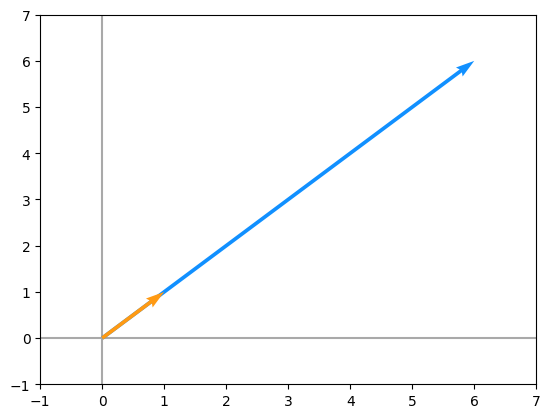

Av is actualy 6*v


In [40]:
A = np.array([[5, 1], [3, 3]])
v = np.array([[1], [1]])

Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)
plt.show()

print("Av is actualy 6*v")

Try to find the **second eigenvector** of the matrix manually.  
Verify that it indeed satisfies the eigenvector equation and determine its corresponding **eigenvalue**.


In [ ]:
v2 = # eigenvector
Av = # eigenvector projected using the matrix
plotVectors([Av.flatten(), v2.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-3, 1)
plt.show()
print(f"The eigenvector is: {} and the corresponding eigenvalue is: {}")

Next, compute the eigenvectors using NumPy.

In [41]:
eigval, eigvect = np.linalg.eig(A)
print(f"Eigenvalues computed by numpy: {eigval}, \n eigenvectors: \n{eigvect}")

Eigenvalues computed by numpy: [6. 2.], 
 eigenvectors: 
[[ 0.70710678 -0.31622777]
 [ 0.70710678  0.9486833 ]]


You may notice that the eigenvectors obtained from NumPy differ slightly from the ones you calculated manually.  
Try computing the **norms** of the vectors (the columns of the returned eigenvector matrix) — this will help you understand **why** the vectors appear different.

In [42]:
np.apply_along_axis(np.linalg.norm, 0, eigvect)

array([1., 1.])

The eigenvector corresponding $\lambda = 2$ is $(-0.31622777, 0.9486833)^T $.



(0.0, 7.0)

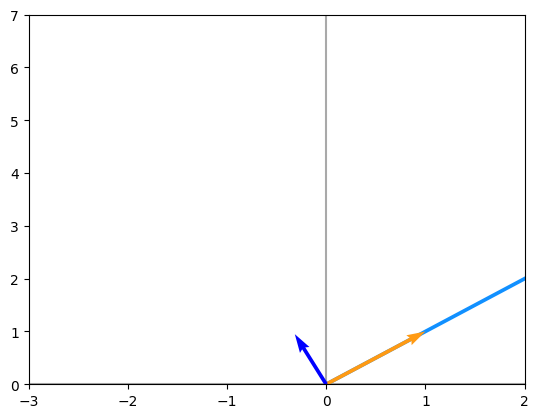

In [43]:
v_np = eigvect[:,1]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=[blue, orange, 'blue'])
plt.xlim(-3, 2)
plt.ylim(0, 7)

The eigenvector corresponding to $\lambda = 6$ can be rescaled to vector $(1,1)^T$.

### Visualisations of eigenvectors
Below, we have a function that visualizes how a matrix transforms all vectors that lie on the **unit circle**.  
It shows how the matrix stretches, compresses, or rotates the circle — transforming it into an **ellipse** that illustrates the matrix's effect on direction and magnitude.


In [44]:
#@title Code for visualisation of transformation made by a matrix, together with eigenvectors { display-mode: "form" }
def linearTransformation(transformMatrix):
    orange = '#FF9A13'
    blue = '#1190FF'
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)
    # Calculate eigenvectors and eigenvalues
    eigVecs = np.linalg.eig(transformMatrix)[1]
    eigVals = np.diag(np.linalg.eig(transformMatrix)[0])

    # Create vectors of 0 to store new transformed values
    newX = np.zeros(len(x))
    newY = np.zeros(len(x))
    for i in range(len(x)):
        unitVector_i = np.array([x[i], y[i]])
        # Apply the matrix to the vector
        newXY = transformMatrix.dot(unitVector_i)
        newX[i] = newXY[0]
        newY[i] = newXY[1]
    plt.figure(figsize=[8,8])
    plotVectors([eigVecs[:,0], eigVecs[:,1]],
                cols=[blue, blue])
    plotVectors([eigVals[0,0]*eigVecs[:,0], eigVals[1,1]*eigVecs[:,1]],
                cols=[orange, orange])
    plt.plot(x, y)


    plt.plot(newX, newY)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    # plt.legend(loc='best')
    plt.show()


Visualisation of rotation of vectors in unit circle by the matrix for which we found the eigenvalues.

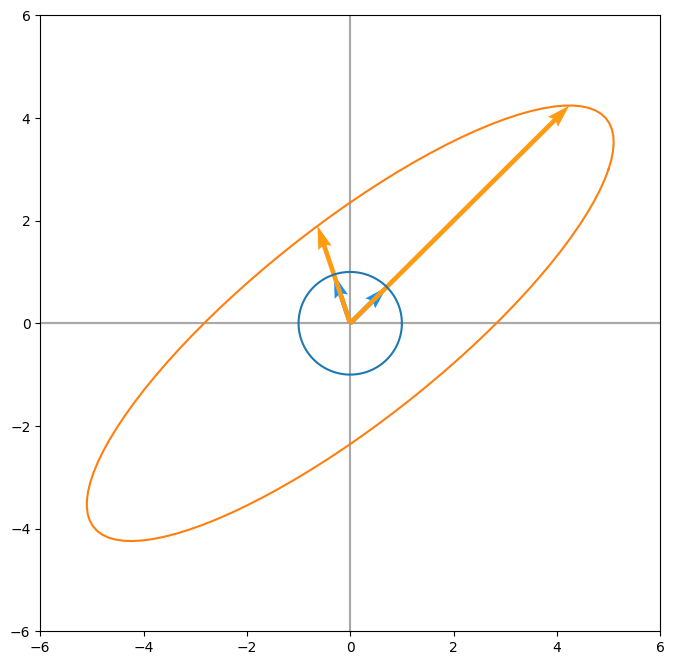

In [47]:
A = np.array([[5, 1], [3, 3]])
linearTransformation(A)

Visualization of the rotation of vectors on the unit circle by a symmetric matrix. The eigenvectors are the semi-axes of the ellipse and are orthogonal. This property can be utilized in eigendecomposition.

Print the answer to the question: how does the following equation simplify if $V$ (matrix with eigenvectors of symmetric matrix as columns) has orthonormal columns?

$$
B = VAV^{-1}.
$$


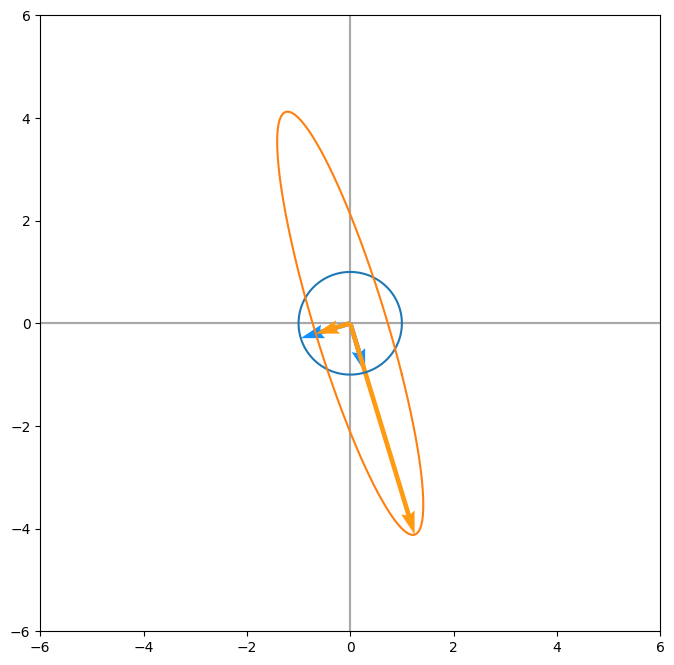

In [48]:
A = np.array([[1,-1], [-1, 4]])
linearTransformation(A)

print("")

For diagonal matrices the eigenvectors are in the direction of the axes, therefore also the ellipse is not rotated.

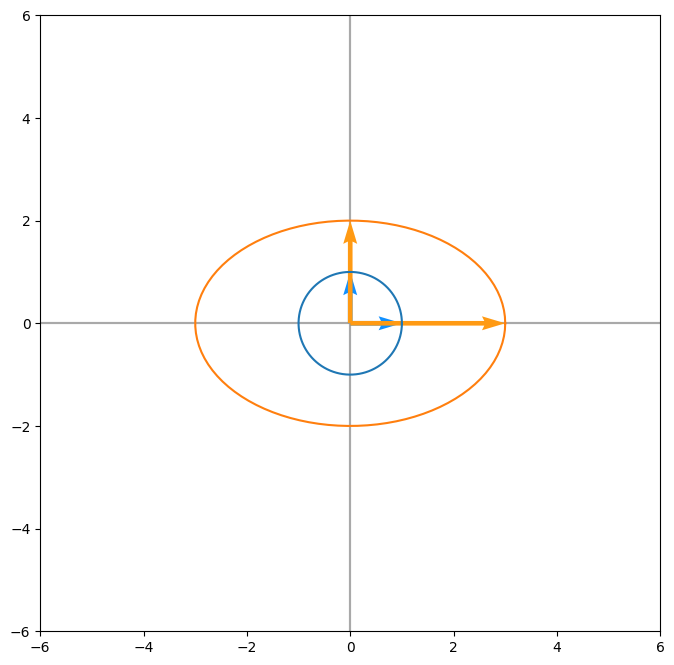

In [49]:
A = np.array([[3,0], [0, 2]])
linearTransformation(A)

## Transformation from a basis into another basis

Below you are provided with a standardized data (zero mean and standard deviation equal to 1). Now, we will try to move the vectors from the elementary basis into the basis $\beta$ described by matrix $U$. Try to find the transition matrix into basis $\beta$. What properties does the new basis have? Next, transform the matrix `iris_scaled` to the new basis. The vectors in `iris_scaled` are stored in rows. Finally, check the 4 columns in the matrix transformed to basis $\beta$. Can they form a basis?

Note:
Relationship between vector $b$ in basis $\beta$ with basis vectors of matrix $U$ and vector $v$ in elementary basis is expressed as follows: $Ub = v$. Try to obtain the vector $b$ and try to simplify the process considering properties of matrix $U$.

To obtain `U`, `v` and the data, run the following code.

## Transformation from One Basis to Another

In the data below, we first **standardize** the dataset (zero mean and unit standard deviation).  
Next, we extract the **eigenvalues** and **eigenvectors** from the **Gram matrix** of the standardized data, and then we **sort the eigenvectors** according to their corresponding eigenvalues.

This procedure corresponds to a method that you will learn about in more detail later.  
For now, we will focus not on the method itself, but on the **matrix representing the new basis**.


In [51]:
# imports modules
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# loads the data
iris = datasets.load_iris()
iris_scaled = StandardScaler().fit_transform(iris['data'][0:10,:])
# extracts eigenvalues and eigenvectors
v, U = np.linalg.eig(iris_scaled.T @ iris_scaled)
# sort the matrix by eigenvalues
U = U[:,np.argsort(-v)]



You have to transform the vectors from the **elementary basis** into the basis $\beta$, described by the matrix $U$.

Your task step by step:

1. Find the **transition matrix** to the basis $\beta$.  
   What properties does the new basis have?

2. Transform the matrix `iris_scaled` to the new basis.  
   The vectors to be transformed are stored in the **rows** of `iris_scaled`. Also, verify if the process of obtaining the transformation matrix can be simplified.

3. Examine the four columns of the matrix transformed to basis $\beta$.  
   Can they form a **basis**?

---

**Note:**  
The relationship between the vector $\boldsymbol{b}$ in basis $\beta$ (with basis vectors from matrix $U$) and the vector $\boldsymbol{v}$ in the elementary basis is given by:

$$
U\boldsymbol{b} = \boldsymbol{v}.
$$
<!--
You have to find the matrix, which will transform $v$ to $b$ and simplify the computation by considering the **properties of matrix $U$**. -->

In [70]:
print(f"Provided data:\n {iris_scaled}")
#print(f"Provided basis:\n {U}")
iris_scaled_new = np.array([np.linalg.inv(U) @ x for x in iris_scaled])
print(iris_scaled_new)

iris_scaled_trans = (U.T @ iris_scaled.T).T
print(iris_scaled_trans)



Provided data:
 [[ 0.86828953  0.65207831 -0.48795004 -0.26726124]
 [ 0.14471492 -1.06391725 -0.48795004 -0.26726124]
 [-0.57885968 -0.37751902 -1.46385011 -0.26726124]
 [-0.94064699 -0.72071813  0.48795004 -0.26726124]
 [ 0.50650222  0.99527742 -0.48795004 -0.26726124]
 [ 1.95365143  2.02487476  2.43975018  2.40535118]
 [-0.94064699  0.3088792  -0.48795004  1.06904497]
 [ 0.50650222  0.3088792   0.48795004 -0.26726124]
 [-1.66422159 -1.40711636 -0.48795004 -0.26726124]
 [ 0.14471492 -0.72071813  0.48795004 -1.60356745]]
[[ 4.44083913e-01 -7.12178289e-01  8.83390924e-01  6.21986715e-02]
 [-8.65607010e-01 -2.31155448e-01 -1.00668244e-01  8.05942735e-01]
 [-1.32045559e+00  2.80075576e-01  9.21075683e-01  1.46489445e-01]
 [-7.66226371e-01  3.37106293e-01 -9.69155536e-01 -2.71604925e-01]
 [ 4.48313147e-01 -4.99455590e-01  9.81484949e-01 -3.78010837e-01]
 [ 4.37779416e+00  4.40681242e-01 -5.17607966e-01  1.66635286e-01]
 [-4.54485451e-02  1.45105399e+00  4.57072375e-01 -2.11274913e-01]
 [ 5